<a href="https://colab.research.google.com/github/Vannod/Ing_Financiera/blob/main/P2/Proyecto_Ing_Financiera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NCAA Collage Football

Alumnos:

Macias Cid Rodrigo

Mejia Cedillo Diego

Ortiz Diaz Vania Yael

## División FCS

## Estadísticas
* Passing Yards
* Rushing Yards
* Scoring Offense
* Scoring Deffense
* Winning porcentage

### Librerías

In [75]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Passing Yards

In [76]:
def passing_yards_table(url):
    respuesta = requests.get(url)
    soup = BeautifulSoup(respuesta.text, 'html.parser')
    tabla = soup.find('table')

    if not tabla:
        return pd.DataFrame()

    filas = tabla.find_all('tr')
    encabezados = [col.text.strip() for col in filas[0].find_all('th')] if filas else []
    datos = [
        [col.text.strip() for col in fila.find_all('td')]
        for fila in filas[1:]
    ]

    return pd.DataFrame(datos, columns=encabezados)

# URLs de las páginas
urls = [
    'https://www.ncaa.com/stats/football/fcs/current/individual/453',
    'https://www.ncaa.com/stats/football/fcs/current/individual/453/p2',
    'https://www.ncaa.com/stats/football/fcs/current/individual/453/p3',
]

# Extraer y combinar datos de todas las páginas
dataframes = [passing_yards_table(url) for url in urls]
NCAA_PY = pd.concat(dataframes, axis=0, ignore_index=True)

# Agregar columna de rank
NCAA_PY['Rank'] = np.arange(1, len(NCAA_PY) + 1)

NCAA_PY

,Rank,Name,Team,Cl,Position,G,Pass Att,Pass Com,Int,Pass TD,Pass Yds
0,1,Miles Hastings,UC Davis,Sr.,QB,14,521,367,13,38,4493
1,2,Paxton DeLaurent,Southeast Mo. St.,Sr.,QB,13,618,368,15,33,4087
2,3,Derek Robertson,Monmouth,Sr.,QB,12,435,283,6,31,3937
3,4,Maverick McIvor,Abilene Christian,Sr.,QB,13,499,312,7,30,3828
4,5,Zach Calzada,UIW,Sr.,QB,14,528,347,9,35,3791
...,...,...,...,...,...,...,...,...,...,...,...
145,146,Jonah Chong,Northern Colo.,Sr.,QB,11,24,12,0,0,50
146,147,AJ Wilson,Houston Christian,So.,WR,12,1,1,0,1,49
147,148,Austin McCready,Alabama A&M,Jr.,K,12,2,2,0,0,48
148,149,Jalen Patrick,Presbyterian,So.,WR,12,3,2,0,1,48


### Rushing Yards

In [77]:
def rushing_yards_table(url):
    respuesta = requests.get(url)
    soup = BeautifulSoup(respuesta.text, 'html.parser')
    tabla = soup.find('table')

    if not tabla:
        return pd.DataFrame()

    filas = tabla.find_all('tr')
    encabezados = [col.text.strip() for col in filas[0].find_all('th')] if filas else []
    datos = [
        [col.text.strip() for col in fila.find_all('td')]
        for fila in filas[1:]
    ]

    return pd.DataFrame(datos, columns=encabezados)

# URLs de las páginas
urls = [
    'https://www.ncaa.com/stats/football/fcs/current/individual/469',
    'https://www.ncaa.com/stats/football/fcs/current/individual/469/p2',
    'https://www.ncaa.com/stats/football/fcs/current/individual/469/p3',
]

# Extraer y combinar datos de todas las páginas
dataframes = [rushing_yards_table(url) for url in urls]
NCAA_RY = pd.concat(dataframes, axis=0, ignore_index=True)

# Agregar columna de rank
NCAA_RY['Rank'] = np.arange(1, len(NCAA_RY) + 1)

NCAA_RY

,Rank,Name,Team,Cl,Position,G,Rush,Rush TD,Rush Yds
0,1,Kayvon Britten,Tarleton St.,Sr.,RB,14,340,18,1982
1,2,Targhee Lambson,Southern Utah,Sr.,RB,12,320,23,1921
2,3,Lan Larison,UC Davis,Sr.,RB,14,284,17,1465
3,4,Malik Grant,Rhode Island,Sr.,RB,14,272,13,1426
4,5,Scottre Humphrey,Montana St.,So.,RB,15,199,16,1386
...,...,...,...,...,...,...,...,...,...
145,146,Elijah Burris,Hampton,Sr.,RB,9,122,4,489
146,147,Darryle Evans,Houston Christian,Sr.,RB,12,95,4,488
147,148,Sone Ntoh,Monmouth,Sr.,RB,12,109,25,487
148,149,Kelvin Dean,Florida A&M,Sr.,RB,12,94,1,482


### Scoring Offense

In [78]:
def scoring_offense_table(url):
    respuesta = requests.get(url)
    soup = BeautifulSoup(respuesta.text, 'html.parser')
    tabla = soup.find('table')

    if not tabla:
        return pd.DataFrame()

    filas = tabla.find_all('tr')
    encabezados = [col.text.strip() for col in filas[0].find_all('th')] if filas else []
    datos = [
        [col.text.strip() for col in fila.find_all('td')]
        for fila in filas[1:]
    ]

    return pd.DataFrame(datos, columns=encabezados)

# URLs de las páginas
urls = [
    'https://www.ncaa.com/stats/football/fcs/current/team/27',
    'https://www.ncaa.com/stats/football/fcs/current/team/27/p2',
    'https://www.ncaa.com/stats/football/fcs/current/team/27/p3',
]

# Extraer y combinar datos de todas las páginas
dataframes = [scoring_offense_table(url) for url in urls]
NCAA_SO = pd.concat(dataframes, axis=0, ignore_index=True)

# Agregar columna de rank
NCAA_SO['Rank'] = np.arange(1, len(NCAA_SO) + 1)

NCAA_SO

,Rank,Team,G,TDs,PAT,2PT,Def Pts,FG,Saf,Pts,PPG
0,1,Montana St.,16,87,83,1,0,15,0,652.00,40.8
1,2,Monmouth,12,67,58,1,0,2,0,468.00,39.0
2,3,North Dakota St.,16,81,77,1,0,15,0,610.00,38.1
3,4,South Dakota St.,15,73,70,0,0,14,0,550.00,36.7
4,5,Jackson St.,14,63,60,1,0,22,2,510.00,36.4
...,...,...,...,...,...,...,...,...,...,...,...
118,119,Valparaiso,11,19,16,3,0,11,1,171.00,15.5
119,120,Charleston So.,12,22,18,1,0,6,0,170.00,14.2
120,121,VMI,12,18,17,0,0,8,0,149.00,12.4
121,122,Northwestern St.,12,18,18,0,0,6,0,144.00,12.0


### Scoring Deffense

In [79]:
def scoring_deffense_table(url):
    respuesta = requests.get(url)
    soup = BeautifulSoup(respuesta.text, 'html.parser')
    tabla = soup.find('table')

    if not tabla:
        return pd.DataFrame()

    filas = tabla.find_all('tr')
    encabezados = [col.text.strip() for col in filas[0].find_all('th')] if filas else []
    datos = [
        [col.text.strip() for col in fila.find_all('td')]
        for fila in filas[1:]
    ]

    return pd.DataFrame(datos, columns=encabezados)

# URLs de las páginas
urls = [
    'https://www.ncaa.com/stats/football/fcs/current/team/28',
    'https://www.ncaa.com/stats/football/fcs/current/team/28/p2',
    'https://www.ncaa.com/stats/football/fcs/current/team/28/p3',
]

# Extraer y combinar datos de todas las páginas
dataframes = [scoring_deffense_table(url) for url in urls]
NCAA_SD = pd.concat(dataframes, axis=0, ignore_index=True)

# Agregar columna de rank
NCAA_SD['Rank'] = np.arange(1, len(NCAA_SD) + 1)

NCAA_SD

,Rank,Team,G,TDs,Opp XP,2PT,Opp DXP,Opp FGM,Opp Saf,Pts,Avg
0,1,South Dakota St.,15,23,21,1,0,16,0,209.00,13.93
1,2,Columbia,10,18,12,1,0,13,0,161.00,16.10
2,3,Butler,12,26,22,0,0,6,0,196.00,16.33
3,4,Alabama St.,12,24,20,2,0,10,1,200.00,16.67
4,5,Dayton,11,21,19,2,0,12,1,187.00,17.00
...,...,...,...,...,...,...,...,...,...,...,...
118,119,Portland St.,11,59,53,2,0,10,0,441.00,40.09
119,120,Mississippi Val.,12,62,59,1,0,16,1,483.00,40.25
120,121,Western Ill.,12,69,65,0,0,12,0,515.00,42.92
121,122,Northwestern St.,12,70,69,0,0,18,1,545.00,45.42


### Winning Porcentage

In [80]:
def winning_porcentage_table(url):
    respuesta = requests.get(url)
    soup = BeautifulSoup(respuesta.text, 'html.parser')
    tabla = soup.find('table')

    if not tabla:
        return pd.DataFrame()

    filas = tabla.find_all('tr')
    encabezados = [col.text.strip() for col in filas[0].find_all('th')] if filas else []
    datos = [
        [col.text.strip() for col in fila.find_all('td')]
        for fila in filas[1:]
    ]

    return pd.DataFrame(datos, columns=encabezados)

# URLs de las páginas
urls = [
    'https://www.ncaa.com/stats/football/fcs/current/team/742',
    'https://www.ncaa.com/stats/football/fcs/current/team/742',
    'https://www.ncaa.com/stats/football/fcs/current/team/742',
]

# Extraer y combinar datos de todas las páginas
dataframes = [winning_porcentage_table(url) for url in urls]
NCAA_WP = pd.concat(dataframes, axis=0, ignore_index=True)

# Agregar columna de rank
NCAA_WP['Rank'] = np.arange(1, len(NCAA_WP) + 1)

NCAA_WP

,Rank,Team,W,L,T,Pct
0,1,Montana St.,15,1,0,.938
1,2,North Dakota St.,14,2,0,.875
2,3,Jackson St.,12,2,0,.857
3,4,Delaware,9,2,0,.818
4,5,Dartmouth,8,2,0,.800
...,...,...,...,...,...,...
145,146,Southeastern La.,7,5,0,.583
146,147,Southern Utah,7,5,0,.583
147,148,Tennessee Tech,7,5,0,.583
148,149,Towson,7,5,0,.583


## Análisis

Correlación entre variables

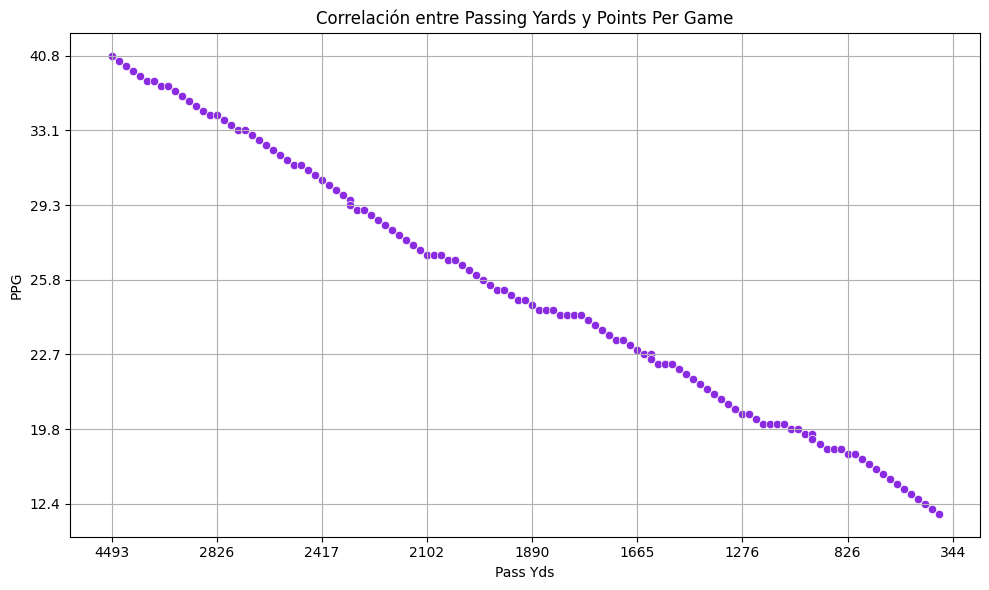

In [81]:
correlacion = pd.DataFrame({
    'Pass Yds': NCAA_PY['Pass Yds'],
    'Rush Yds': NCAA_RY['Rush Yds'],
    'PPG': NCAA_SO['PPG']
})

plt.figure(figsize=(10, 6))

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

sns.scatterplot(data=correlacion, x='Pass Yds', y='PPG', color = 'blueviolet')

plt.title('Correlación entre Passing Yards y Points Per Game')
plt.xlabel('Pass Yds')
plt.ylabel('PPG')
plt.grid(True)
plt.tight_layout()
plt.show()

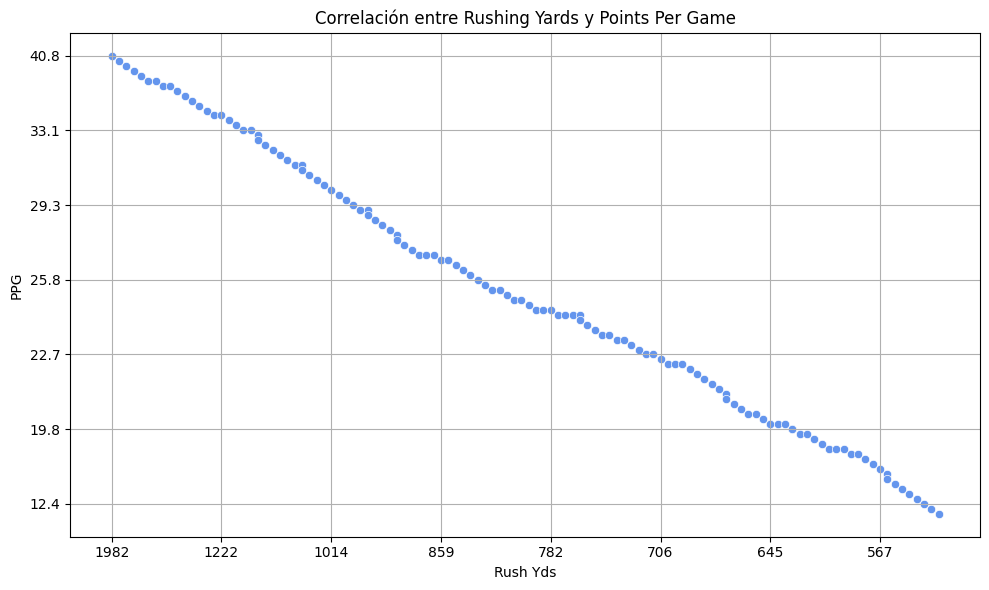

In [82]:
plt.figure(figsize=(10, 6))

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

sns.scatterplot(data=correlacion, x='Rush Yds', y='PPG', color = 'cornflowerblue')

plt.title('Correlación entre Rushing Yards y Points Per Game')
plt.xlabel('Rush Yds')
plt.ylabel('PPG')
plt.grid(True)
plt.tight_layout()
plt.show()

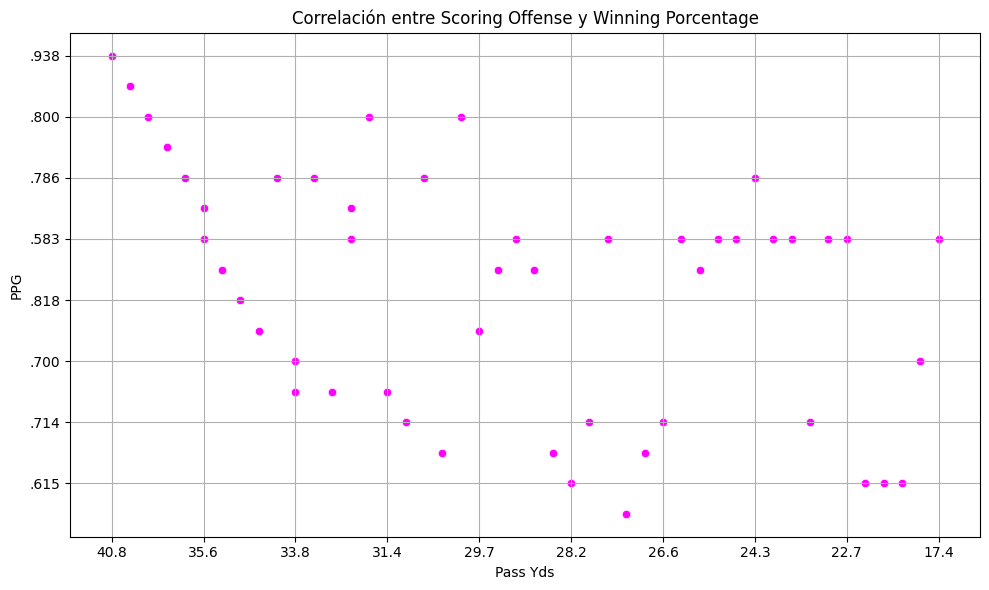

In [83]:
plt.figure(figsize=(10, 6))

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

Off = NCAA_SO.merge(NCAA_WP, on='Team')
sns.scatterplot(data=Off, x='PPG', y='Pct', color='magenta')

plt.title('Correlación entre Scoring Offense y Winning Porcentage')
plt.xlabel('Pass Yds')
plt.ylabel('PPG')
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
correlacion_PY = NCAA_PY['Pass Yds'].corr(NCAA_SO['PPG'])
print(f"Correlación entre Pass Yds y PPG: {correlacion_PY}")

correlacion_RY = NCAA_RY['Rush Yds'].corr(NCAA_SO['PPG'])
print(f"Correlación entre Rush Yds y PPG: {correlacion_RY}")

correlacion_WP = NCAA_WP['Pct'].corr(NCAA_SO['PPG'])
print(f"Correlación entre Pct y PPG: {correlacion_WP}")

Correlación entre Pass Yds y PPG: 0.9845903422426308
Correlación entre Rush Yds y PPG: 0.9495649204146911
Correlación entre Pct y PPG: 0.13868444841937602


Eficiencia de jugadas por equipo

In [85]:
# Jugadas por aire
NCAA_SO = pd.merge(NCAA_SO, NCAA_PY[['Team', 'Pass Yds']], on='Team', how='inner', suffixes=('', '_py'))

# Jugadas por tierra
NCAA_SO = pd.merge(NCAA_SO, NCAA_RY[['Team', 'Rush Yds']], on='Team', how='inner', suffixes=('', '_ry'))

NCAA_SO['Pass Yds'] = NCAA_SO['Pass Yds'].astype(str)
NCAA_SO['Rush Yds'] = NCAA_SO['Rush Yds'].astype(str)

NCAA_SO['Pass Yds'] = pd.to_numeric(NCAA_SO['Pass Yds'].str.replace(',', ''), errors='coerce')
NCAA_SO['Rush Yds'] = pd.to_numeric(NCAA_SO['Rush Yds'].str.replace(',', ''), errors='coerce')

Team_ = NCAA_SO.groupby('Team').agg({'Pass Yds':'mean', 'Rush Yds':'mean'}).reset_index()
NCAA_TEAM = Team_.sort_values(by=['Pass Yds', 'Rush Yds'], ascending=False)
NCAA_TEAM

,Team,Pass Yds,Rush Yds
83,UC Davis,4493.0,1465.0
49,Monmouth,3937.0,648.0
0,Abilene Christian,3828.0,985.0
84,UIW,3791.0,735.5
48,Missouri St.,3604.0,824.0
...,...,...,...
17,Davidson,557.0,1077.0
16,Dartmouth,533.0,711.0
87,VMI,218.0,800.0
94,Wofford,138.0,675.0


Puntos promedio por equipo

Offense

In [86]:
NCAA_SO['Pts'] = pd.to_numeric(NCAA_SO['Pts'], errors='coerce')

# Puntos promedio por equipo
Puntos_promedio_SO = NCAA_SO.groupby('Team')['Pts'].mean().sort_values(ascending=False)
Puntos_promedio_SO = pd.DataFrame({'Puntos promedio': Puntos_promedio_SO})
Puntos_promedio_SO

,Puntos promedio
Team,
Montana St.,652.0
North Dakota St.,610.0
South Dakota St.,550.0
Jackson St.,510.0
South Dakota,501.0
...,...
Wofford,196.0
Sacred Heart,196.0
Valparaiso,171.0


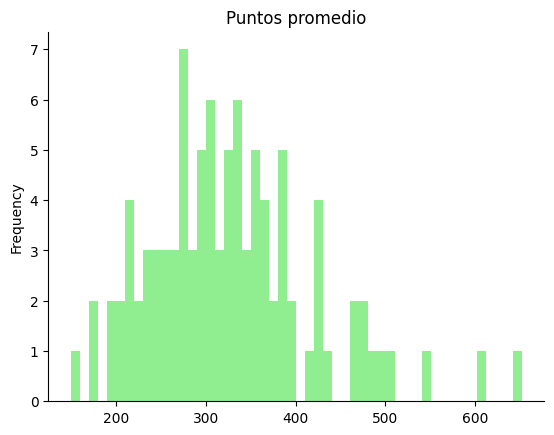

In [87]:
# Gráfico
Puntos_promedio_SO['Puntos promedio'].plot(kind='hist', bins=50, title='Puntos promedio', color = 'lightgreen')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [88]:
media = np.mean(Puntos_promedio_SO['Puntos promedio'])
desv = np.std(Puntos_promedio_SO['Puntos promedio'], ddof=1)


n = len(Puntos_promedio_SO['Puntos promedio'])
error_estandar = desv / np.sqrt(n)


# Intervalo del 95%
Intervalo = 0.95
z = 1.96
margen_error = z * error_estandar
lim_inf = media - margen_error
lim_sup = media + margen_error

print(f"Intervalo de confianza del 95%: ({lim_inf:.4f}, {lim_sup:.4f})")

Intervalo de confianza del 95%: (308.3997, 345.5590)


Deffense

In [89]:
NCAA_SD['Pts'] = pd.to_numeric(NCAA_SD['Pts'], errors='coerce')

# Puntos promedio por equipo
Puntos_promedio_SD = NCAA_SD.groupby('Team')['Pts'].mean().sort_values(ascending=False)
Puntos_promedio_SD = pd.DataFrame({'Puntos promedio': Puntos_promedio_SD})
Puntos_promedio_SD

,Puntos promedio
Team,
Murray St.,560.0
Northwestern St.,545.0
Western Ill.,515.0
Mississippi Val.,483.0
Utah Tech,470.0
...,...
N.C. Central,202.0
Alabama St.,200.0
Butler,196.0


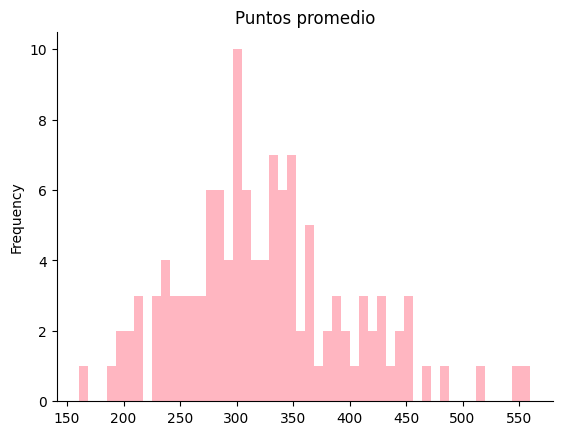

In [90]:
# Gráfico
Puntos_promedio_SD['Puntos promedio'].plot(kind='hist', bins=50, title='Puntos promedio', color = 'lightpink')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [91]:
media = np.mean(Puntos_promedio_SD['Puntos promedio'])
desv = np.std(Puntos_promedio_SD['Puntos promedio'], ddof=1)


n = len(Puntos_promedio_SD['Puntos promedio'])
error_estandar = desv / np.sqrt(n)


# Intervalo del 95%
Intervalo = 0.95
z = 1.96
margen_error = z * error_estandar
lim_inf = media - margen_error
lim_sup = media + margen_error

print(f"Intervalo de confianza del 95%: ({lim_inf:.4f}, {lim_sup:.4f})")

Intervalo de confianza del 95%: (311.1522, 337.8884)


##  Análisis Clusters

In [92]:
import pandas as pd

# Especifica la ruta completa del archivo
file_path = '/content/NCAA Statistics corregido.xlsx'

# Leer el archivo Excel
try:

    # Crear una nueva tabla con columnas específicas
    columnas_seleccionadas = ['College', 'Conference', 'Cl', 'Pos', 'Total Yds', 'Plays', 'YPG']
    tabla_especifica = df[columnas_seleccionadas]

    print("\n :")
    print(tabla_especifica)  # Mostrar las primeras filas de la nueva tabla

except Exception as e:
    print(f"Hubo un error leyendo o procesando el archivo: {e}")



 :
              College     Conference   Cl Pos  Total Yds  Plays     YPG
0          Boise St.   Mountain West  Jr.  RB       2613    364  201.00
1        Arizona St.          Big 12  Sr.  RB       2074    300  172.83
2     North Carolina             ACC  Jr.  RB       2033    319  169.42
3                UCF          Big 12  Sr.  RB       1898    255  158.17
4         Texas Tech          Big 12  Sr.  RB       1704    314  154.91
..                ...            ...  ...  ..        ...    ...     ...
195              BYU          Big 12  Sr.  WR        864     56   72.00
196     Old Dominion        Sun Belt  Fr.  QB        647    114   71.89
197           Toledo             MAC  Sr.  RB        790     88   71.82
198           Purdue         Big Ten  Jr.  RB        857    155   71.42
199             UTSA    The American  Jr.  WR        714     38   71.40

[200 rows x 7 columns]


<ipython-input-93-60a85910e11e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_clustering['Cl'] = label_encoder_cl.fit_transform(datos_clustering['Cl'])
<ipython-input-93-60a85910e11e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_clustering['Conference'] = label_encoder_conference.fit_transform(datos_clustering['Conference'])


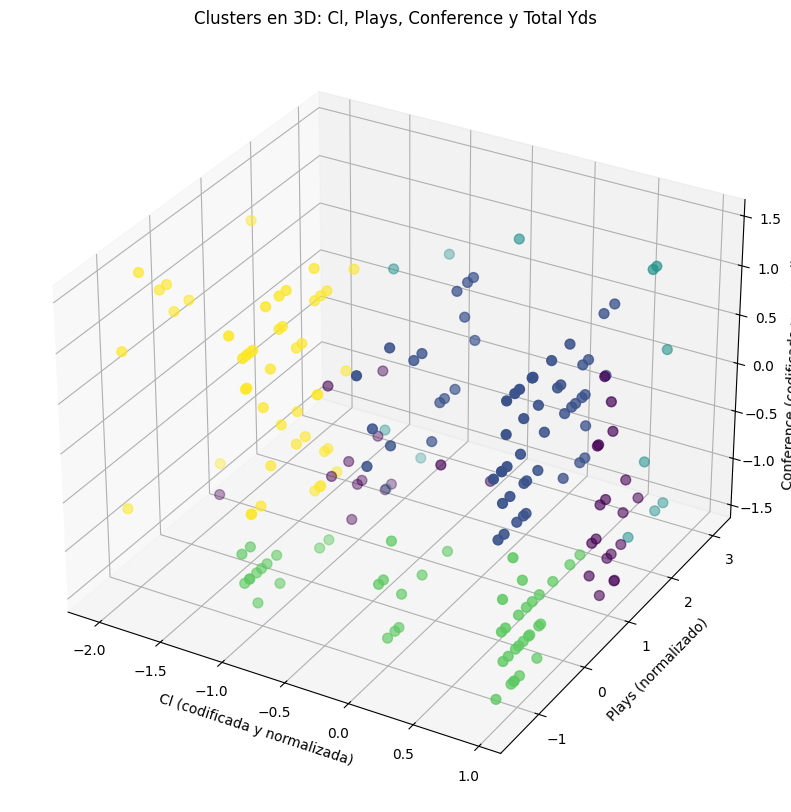


Datos con Clusters:
      Cl  Plays     Conference  Total Yds  Cluster
0    Jr.    364  Mountain West       2613        2
1    Sr.    300         Big 12       2074        2
2    Jr.    319            ACC       2033        2
3    Sr.    255         Big 12       1898        2
4    Sr.    314         Big 12       1704        2
..   ...    ...            ...        ...      ...
195  Sr.     56         Big 12        864        3
196  Fr.    114       Sun Belt        647        4
197  Sr.     88            MAC        790        1
198  Jr.    155        Big Ten        857        4
199  Jr.     38   The American        714        4

[200 rows x 5 columns]

Características promedio de cada cluster:
               Rank          G     Rush Yds     Rec Yds  Punt Ret Yds  \
Cluster                                                                 
0         49.156250  11.937500  1035.937500  187.593750      4.906250   
1        116.423729  11.610169   433.305085  451.847458     29.966102   
2       

In [93]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Especifica la ruta completa del archivo
file_path = '/content/NCAA Statistics corregido.xlsx'

try:
    # Leer el archivo Excel
    df = pd.read_excel(file_path)

    # Seleccionar las columnas necesarias
    columnas_seleccionadas = ['Cl', 'Plays', 'Conference', 'Total Yds']
    datos_clustering = df[columnas_seleccionadas]

    # Convertir las columnas categóricas a valores numéricos
    label_encoder_cl = LabelEncoder()
    label_encoder_conference = LabelEncoder()
    datos_clustering['Cl'] = label_encoder_cl.fit_transform(datos_clustering['Cl'])
    datos_clustering['Conference'] = label_encoder_conference.fit_transform(datos_clustering['Conference'])

    # Normalizar los datos
    scaler = StandardScaler()
    datos_normalizados = scaler.fit_transform(datos_clustering)

    # Aplicar K-Means
    kmeans = KMeans(n_clusters=5, random_state=42)  # Cambia n_clusters según lo necesario
    kmeans.fit(datos_normalizados)

    # Agregar los clusters al DataFrame original
    df['Cluster'] = kmeans.labels_

    # Visualizar los clusters en 3D
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot de los clusters
    ax.scatter(datos_normalizados[:, 0], datos_normalizados[:, 1], datos_normalizados[:, 2],
               c=kmeans.labels_, cmap='viridis', s=50)

    ax.set_title('Clusters en 3D: Cl, Plays, Conference y Total Yds')
    ax.set_xlabel('Cl (codificada y normalizada)')
    ax.set_ylabel('Plays (normalizado)')
    ax.set_zlabel('Conference (codificada y normalizada)')

    plt.show()

    # Ver los datos con los clusters asignados
    print("\nDatos con Clusters:")
    print(df[['Cl', 'Plays', 'Conference', 'Total Yds', 'Cluster']])

    # Analizar las características promedio de cada cluster
    print("\nCaracterísticas promedio de cada cluster:")
    if 'Cluster' in df.columns:
        cluster_means = df.groupby('Cluster').mean(numeric_only=True)
        print(cluster_means)
    else:
        print("La columna 'Cluster' no existe en el DataFrame.")

except Exception as e:
    print(f"Hubo un error leyendo o procesando el archivo: {e}")


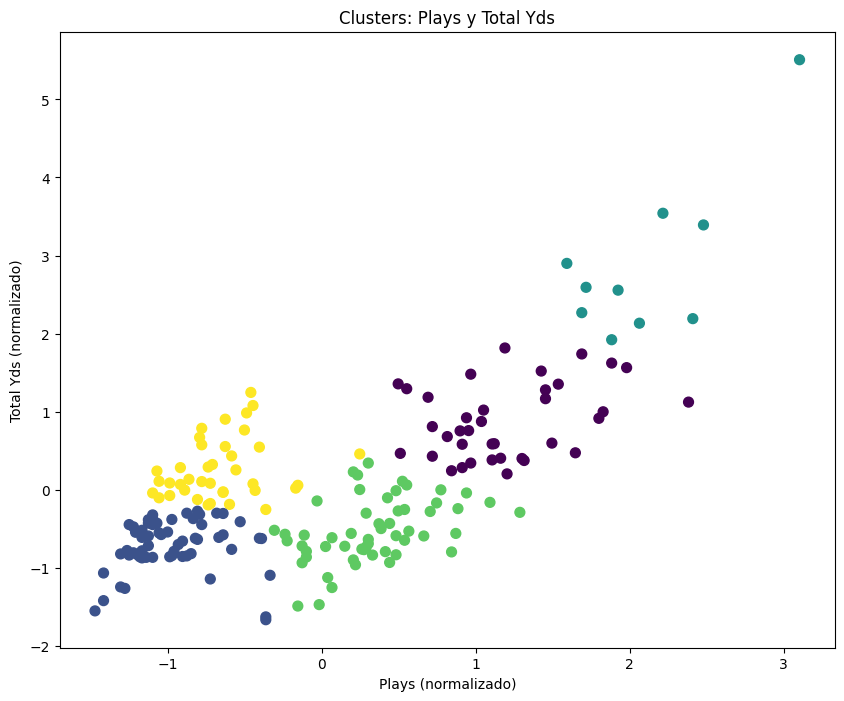


Datos con Clusters:
     Plays  Total Yds  Cluster
0      364       2613        2
1      300       2074        2
2      319       2033        2
3      255       1898        2
4      314       1704        2
..     ...        ...      ...
195     56        864        1
196    114        647        1
197     88        790        1
198    155        857        3
199     38        714        1

[200 rows x 3 columns]

Características promedio de cada cluster:
               Rank          G     Rush Yds     Rec Yds  Punt Ret Yds  \
Cluster                                                                 
0         35.459459  11.972973  1071.918919  205.189189      4.243243   
1        147.733333  11.450000    78.083333  656.533333     55.566667   
2          6.200000  12.300000  1606.500000  260.500000     -0.200000   
3        129.690909  11.618182   802.527273  127.454545      0.000000   
4         71.289474  12.184211    92.131579  890.289474     66.289474   

         KO Ret Yds  Int Ret

In [94]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Especifica la ruta completa del archivo
file_path = '/content/NCAA Statistics corregido.xlsx'

try:
    # Leer el archivo Excel
    df = pd.read_excel(file_path)

    # Seleccionar las columnas necesarias para el clustering
    columnas_seleccionadas = ['Plays', 'Total Yds']
    datos_clustering = df[columnas_seleccionadas]

    # Normalizar los datos
    scaler = StandardScaler()
    datos_normalizados = scaler.fit_transform(datos_clustering)

    # Aplicar K-Means
    kmeans = KMeans(n_clusters=5, random_state=42)  # Cambia n_clusters según lo necesario
    kmeans.fit(datos_normalizados)

    # Agregar los clusters al DataFrame original
    df['Cluster'] = kmeans.labels_

    # Visualizar los clusters
    plt.figure(figsize=(10, 8))
    plt.scatter(datos_normalizados[:, 0], datos_normalizados[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
    plt.title('Clusters: Plays y Total Yds')
    plt.xlabel('Plays (normalizado)')
    plt.ylabel('Total Yds (normalizado)')
    plt.show()

    # Ver los datos con los clusters asignados
    print("\nDatos con Clusters:")
    print(df[['Plays', 'Total Yds', 'Cluster']])

    # Analizar las características promedio de cada cluster
    print("\nCaracterísticas promedio de cada cluster:")
    cluster_means = df.groupby('Cluster').mean(numeric_only=True)
    print(cluster_means)

    # Descripción de los clusters
    print("\nDescripción de los clusters:")
    for cluster_id, stats in cluster_means.iterrows():
        print(f"Cluster {cluster_id}:")
        print(f"- Promedio de jugadas (Plays): {stats['Plays']:.2f}")
        print(f"- Promedio de yardas totales (Total Yds): {stats['Total Yds']:.2f}")
        if stats['Plays'] > cluster_means['Plays'].mean():
            plays_desc = "alto volumen de jugadas"
        else:
            plays_desc = "bajo volumen de jugadas"

        if stats['Total Yds'] > cluster_means['Total Yds'].mean():
            yds_desc = "alto rendimiento en yardas"
        else:
            yds_desc = "bajo rendimiento en yardas"

        print(f"Este cluster está definido por un {plays_desc} y un {yds_desc}.")
        print()

except Exception as e:
    print(f"Hubo un error leyendo o procesando el archivo: {e}")


In [96]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Especifica la ruta completa del archivo
file_path = '/mnt/data/NCAA Statistics corregido.xlsx'

try:
    # Leer el archivo Excel
    df = pd.read_excel(file_path)

    # Seleccionar las columnas necesarias para el clustering
    columnas_seleccionadas = ['Plays', 'YPG']
    datos_clustering = df[columnas_seleccionadas]

    # Normalizar los datos
    scaler = StandardScaler()
    datos_normalizados = scaler.fit_transform(datos_clustering)

    # Aplicar K-Means
    kmeans = KMeans(n_clusters=3, random_state=42)  # Cambia n_clusters según lo necesario
    kmeans.fit(datos_normalizados)

    # Agregar los clusters al DataFrame original
    df['Cluster'] = kmeans.labels_

    # Visualizar los clusters
    plt.figure(figsize=(10, 8))
    plt.scatter(datos_normalizados[:, 0], datos_normalizados[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
    plt.title('Clusters: Plays y YPG')
    plt.xlabel('Plays (normalizado)')
    plt.ylabel('YPG (normalizado)')
    plt.show()

    # Ver los datos con los clusters asignados
    print("\nDatos con Clusters:")
    print(df[['Plays', 'YPG', 'Cluster']])

    # Analizar las características promedio de cada cluster
    print("\nCaracterísticas promedio de cada cluster:")
    cluster_means = df.groupby('Cluster').mean(numeric_only=True)
    print(cluster_means)

    # Descripción de los clusters
    print("\nDescripción de los clusters:")
    for cluster_id, stats in cluster_means.iterrows():
        print(f"Cluster {cluster_id}:")
        print(f"- Promedio de jugadas (Plays): {stats['Plays']:.2f}")
        print(f"- Promedio de yardas por juego (YPG): {stats['YPG']:.2f}")
        if stats['Plays'] > cluster_means['Plays'].mean():
            plays_desc = "alto volumen de jugadas"
        else:
            plays_desc = "bajo volumen de jugadas"

        if stats['YPG'] > cluster_means['YPG'].mean():
            ypg_desc = "alto rendimiento en yardas por juego"
        else:
            ypg_desc = "bajo rendimiento en yardas por juego"

        print(f"Este cluster está definido por un {plays_desc} y un {ypg_desc}.")
        print()

except Exception as e:
    print(f"Hubo un error leyendo o procesando el archivo: {e}")


Hubo un error leyendo o procesando el archivo: [Errno 2] No such file or directory: '/mnt/data/NCAA Statistics corregido.xlsx'
